In [ ]:
import numpy as np
import sklearn as sk
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import transforming_data
import xgboost as xgb
from sklearn.metrics import classification_report

In [195]:
data = transforming_data.get_transformed_data()

In [196]:
data.head()

,Unnamed: 0,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Pets,Environmental_Concerns,Output,fall,spring,summer,winter
0,45292,0.098039,0,0.211043,1.0,0.527842,0,0.039342,1,0.460128,0.841332,0,0,1,0.0,0.0,1.0,0.0
1,5209,0.568627,1,0.054433,2.0,-1.552459,0,0.772838,1,1.002048,1.649704,0,0,1,0.0,1.0,0.0,0.0
2,1011,0.490196,2,0.343701,2.0,0.527842,3,0.181818,0,-0.646771,-0.913988,0,0,0,1.0,0.0,0.0,0.0
3,8657,0.509804,0,0.358402,1.0,0.874559,2,0.103134,0,-0.612181,1.511126,0,1,0,0.0,1.0,0.0,0.0
4,2824,0.019608,1,0.987399,0.0,-0.859026,3,0.331185,2,1.151941,1.280163,0,1,0,1.0,0.0,0.0,0.0


In [197]:
print("Number of features : " , data.shape[1])
print("Number of examples : " , data.shape[0])
print(data.shape)

Number of features :  18
Number of examples :  20000
(20000, 18)


In [198]:
X = data.drop(columns='Output')  
y = data['Output'].values.reshape(-1, 1)

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
y_train.reshape(1 , -1)
y_test.reshape(1 , -1)
print("done")

done


# SVM

In [200]:
def create_svm_model(best_params, X_train, y_train):
    model = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel='rbf')

    model.fit(X_train, y_train)

    return model

In [201]:
def tune_svm_hyperparameters(X_train, y_train, X_test, y_test):
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1, 10]
    }

    svm = SVC(kernel='rbf')

    grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1)

    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_accuracy = grid_search.best_score_

    best_svm = grid_search.best_estimator_

    test_accuracy = best_svm.score(X_test, y_test)

    print("Best parameters found: ", best_params)
    print("Best accuracy achieved (on training data): ", best_accuracy)
    print(f"Test accuracy: {test_accuracy}")

    return best_params, best_accuracy, test_accuracy


In [202]:
best_params, best_accuracy, test_accuracy = tune_svm_hyperparameters(X_train, y_train, X_test, y_test)
model = create_svm_model(best_params , X_train , y_train)

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters found:  {'C': 100, 'gamma': 0.001}
Best accuracy achieved (on training data):  0.7715789473684211
Test accuracy: 0.778


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [203]:
y_pred = model.predict(X_test)
print("accuracy_score: " , accuracy_score(y_pred=y_pred , y_true=y_test))
print("Recall Score:", recall_score(y_true=y_test, y_pred=y_pred, average='binary'))
print("Precision Score:", precision_score(y_true=y_test, y_pred=y_pred, average='binary'))
print("F1 Score:", f1_score(y_true=y_test, y_pred=y_pred, average='binary'))


accuracy_score:  0.778
Recall Score: 0.5095785440613027
Precision Score: 0.5859030837004405
F1 Score: 0.5450819672131147


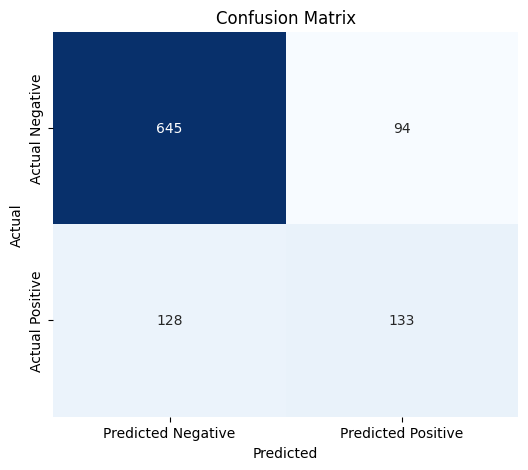

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [205]:
print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       773
           1       0.51      0.59      0.55       227

    accuracy                           0.78      1000
   macro avg       0.69      0.71      0.70      1000
weighted avg       0.79      0.78      0.78      1000



# Random Forest

In [ ]:
from sklearn.model_selection import  train_test_split
# 1. Data Splitting
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.05,random_state=42)

# 2. Model
xgb_model=xgb.XGBClassifier(use_label_encoder=False,eval_metric='logloss') 

# 3. Train model
xgb_model.fit(X_train,y_train)

# 4. Make predictions
y_pred=xgb_model.predict(X_test)

# 5. Evaluate model
accuracy=accuracy_score(y_test,y_pred)

In [ ]:
def create_xgb_model(best_params, X_train, y_train):
    model = xgb.XGBClassifier(
        **best_params,
        use_label_encoder=False,
        eval_metric='logloss'
    )

    model.fit(X_train, y_train)

    return model

In [ ]:
def tune_xgb_hyperparameters(X_train, y_train, X_test, y_test):
    param_grid = {
        'n_estimators': [50, 100],
        'max_depth': [3, 5],
        'colsample_bytree': [0.7, 0.8],
        'learning_rate': [0.01, 0.05],
        'subsample': [0.7, 0.8],
        'gamma': [0, 0.1]
    }

    xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

    random_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_grid, 
                                       cv=3, n_iter=10, n_jobs=-1, verbose=10, random_state=42)

    random_search.fit(X_train, y_train)

    best_params = random_search.best_params_
    best_accuracy = random_search.best_score_

    best_xgb = random_search.best_estimator_
    test_accuracy = best_xgb.score(X_test, y_test)
    
    print("Best parameters found: ", best_params)
    print("Best accuracy achieved (on training data): ", best_accuracy)
    print(f"Test accuracy: {test_accuracy}")

    return best_params, best_accuracy, test_accuracy

In [ ]:
# Call the function to tune hyperparameters and get the best parameters
best_params, best_accuracy, test_accuracy = tune_xgb_hyperparameters(X_train, y_train, X_test, y_test)

# Use the best parameters to create and train the model
model = create_xgb_model(best_params, X_train, y_train)

# Logistic Regression

In [207]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [208]:
def loss(y_pred, y):
    return - (y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

In [ ]:
def cost_func(X , y , w ,b):
    y_pred = sigmoid(np.dot(X , w.T) + b)
    y_pred[np.isinf(y_pred)] = 1e-15
    cost = np.mean(loss(y_pred , y)) # (m , n) @(n , 1)--> (m , 1) + b -> (m+b , 1)
    return cost

In [218]:
def derivatives(X , y , w , b):
    m = X.shape[0]
    dw = np.zeros_like(w)
    db = 0
    y_pred = sigmoid(np.dot(X , w.T) + b)
    y_pred[np.isinf(y_pred)] = 1e-15
    error = y_pred - y
    dw = (1 / m) * np.dot(error.T, X)  # Gradient of loss with respect to weights
    db = (1 / m) * np.sum(error)
    return dw , db

In [219]:
def Gradient_Descent(X , y , w , b , alpha , epochs):
   # Hyperparameters for Adam optimizer
    beta1 = 0.9   # Exponential decay rate for the first moment estimate
    beta2 = 0.999 # Exponential decay rate for the second moment estimate
    epsilon = 1e-8 # Small number to avoid division by zero
    
    m_w = np.zeros_like(w)   # Initialize first moment for weights
    v_w = np.zeros_like(w)   # Initialize second moment for weights
    m_b = 0                  # Initialize first moment for bias
    v_b = 0                  # Initialize second moment for bias
    t = 0                    # Time step counter
    
    for i in range(epochs):
        t += 1  # Increment the time step
        
        # Forward pass
        cost = cost_func(X , y , w , b)
        
        # Backward pass
        dw, db = derivatives(X , y , w , b)
        
        # Update first moment (m) and second moment (v) for weights
        m_w = beta1 * m_w + (1 - beta1) * dw
        v_w = beta2 * v_w + (1 - beta2) * (dw ** 2)
        
        # Update first moment (m) and second moment (v) for bias
        m_b = beta1 * m_b + (1 - beta1) * db
        v_b = beta2 * v_b + (1 - beta2) * (db ** 2)
        
        # Apply bias correction
        m_w_hat = m_w / (1 - beta1 ** t)
        v_w_hat = v_w / (1 - beta2 ** t)
        m_b_hat = m_b / (1 - beta1 ** t)
        v_b_hat = v_b / (1 - beta2 ** t)
        
        # Update weights and bias using the Adam update rule
        w = w - alpha * m_w_hat / (np.sqrt(v_w_hat) + epsilon)
        b = b - alpha * m_b_hat / (np.sqrt(v_b_hat) + epsilon)
        if(i % 10000 == 0):
            print(cost)
    return w, b

In [220]:
w = np.zeros((1 , X.shape[1]))
b = 0

In [ ]:
updated_w , updated_b = Gradient_Descent(X_train , y_train , w , b , 0.01 , 40000)

0.6931471805599453


C:\Users\user\AppData\Local\Temp\ipykernel_12172\4263267161.py:2: RuntimeWarning: divide by zero encountered in log
  return - (y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
C:\Users\user\AppData\Local\Temp\ipykernel_12172\4263267161.py:2: RuntimeWarning: invalid value encountered in multiply
  return - (y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


nan
nan


In [214]:
print(updated_w)
print(updated_b)

[[ 2.22378489e-04  6.34921569e-01 -1.04625068e-01  3.38430860e-01
  -8.96545185e-02  1.02319788e-02 -1.46973321e+01 -5.30072543e-01
   9.55609908e-02 -1.09718138e+01  1.11041730e+01 -3.00085243e-01
  -2.81228580e-01  3.60512428e+00  3.10172585e+00  2.82197192e+00
   2.87033489e+00]]
3.097750221822575


In [215]:
print(cost_func(X_train , y_train , w , b))
print(cost_func(X_test , y_test , w , b))

0.6931471805599453
0.6931471805599454


In [216]:
print(cost_func(X_train , y_train , updated_w , updated_b))
print(cost_func(X_test , y_test , updated_w , updated_b))

nan
nan


C:\Users\user\AppData\Local\Temp\ipykernel_12172\4263267161.py:2: RuntimeWarning: divide by zero encountered in log
  return - (y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
C:\Users\user\AppData\Local\Temp\ipykernel_12172\4263267161.py:2: RuntimeWarning: invalid value encountered in multiply
  return - (y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


In [191]:
y_pred =sigmoid(np.dot(X_test , w.T) + b)
y_pred = [0 if i <= 0.5 else 1 for i in y_pred]
print("accuracy_score: " , accuracy_score(y_pred=y_pred , y_true=y_test))
print("Recall Score:", recall_score(y_true=y_test, y_pred=y_pred, average='binary'))
print("Precision Score:", precision_score(y_true=y_test, y_pred=y_pred, average='binary'))
print("F1 Score:", f1_score(y_true=y_test, y_pred=y_pred, average='binary'))


accuracy_score:  0.724
Recall Score: 0.0
Precision Score: 0.0
F1 Score: 0.0


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
